# I. Using lemonade.csv dataset and focusing on continuous variables 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Temp, Flyers and Sales all normal with outlier(s); Rainfall normalish with right skew, sales constant.

## 1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

also combined with

## 2. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

TEMPERATURE


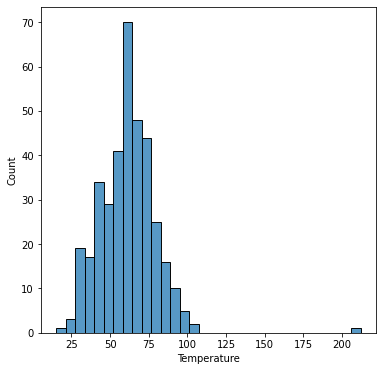

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

Lower Outlier Bound = 16.700000000000003
High Outlier Bound = 104.7
Low Outliers = [15.1]
High Outliers = [212.]

-----

RAINFALL


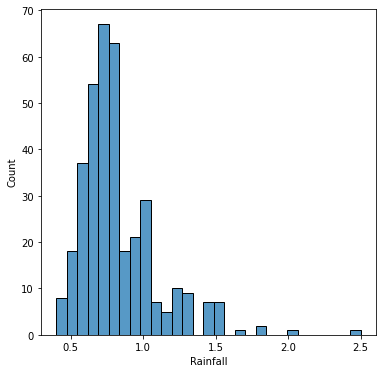

count    365.000000
mean       0.825973
std        0.273890
min        0.400000
25%        0.650000
50%        0.740000
75%        0.910000
max        2.500000
Name: Rainfall, dtype: float64

Lower Outlier Bound = 0.26
High Outlier Bound = 1.3
Low Outliers = []
High Outliers = [2.   1.33 1.33 1.54 1.54 1.54 1.33 1.33 1.67 1.43 1.43 1.54 1.33 1.33
 1.54 1.82 1.43 1.82 1.33 1.43 1.54 1.33 1.43 1.33 1.54 1.43 1.43 2.5 ]

-----

FLYERS


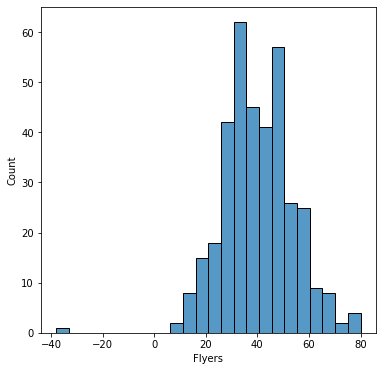

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

Lower Outlier Bound = 4.0
High Outlier Bound = 76.0
Low Outliers = [-38]
High Outliers = [77 80]

-----

SALES


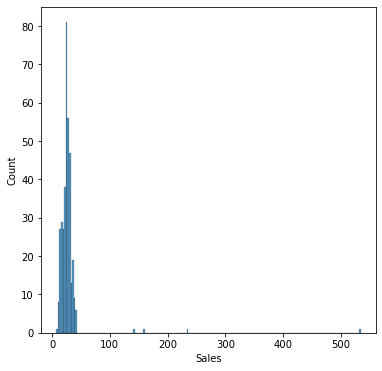

count    365.000000
mean      27.865753
std       30.948132
min        7.000000
25%       20.000000
50%       25.000000
75%       30.000000
max      534.000000
Name: Sales, dtype: float64

Lower Outlier Bound = 5.0
High Outlier Bound = 45.0
Low Outliers = []
High Outliers = [143 158 235 534]

-----



In [22]:
k = 1.5

df_num = df.drop(columns = ['Date','Day','Price'])
for col in df_num.columns:
        print(col.upper())
        plt.figure(figsize = (6,6))
        sns.histplot(data=df[col])
        plt.show()
        print(df.describe()[col])
        print('')
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        iqr = (q3 - q1)
        low_outlier = q1 - (k * iqr)
        high_outlier = q3 + (k * iqr)
        print(f'Lower Outlier Bound = {low_outlier}\nHigh Outlier Bound = {high_outlier}')
        print(f'Low Outliers = {(df_num[df_num[col] < low_outlier])[col].values}\nHigh Outliers = {(df_num[df_num[col] > high_outlier])[col].values}')
        print('\n-----\n')

#### 1. Lower Outliers
- The **Temperature** low outlier is good data and close enough to the cutoff to keep, so keeping that.  
- The **Flyers** low outlier data is a negative, and that is definitely a typo (can't have negative numbers there). So will remove that.

#### 2. Upper Outliers
- **Temperature** had a crazy outlier at boiling temp, so removed that.  
- I would leave all of the **Rainfall** high outliers, as they are good data and indicative o many places where average might be driven down by a dry season.
- **Flyers** high outliers close enough and within reason, so keeping those.
- The **Sales** has 4 high outliers.  Thes are tough as they could be legit from a sale, promotional, something seasonally related, etc.  One is extremely high (534) is over 10x the high outlier bound (and almost 22x median) and even if it is good will throw the analysis off, so would remove that one.  The 235 I would probably do the same for.  I would probably leave the 143 and 158 unless they were really screwing up the rest of the analysis.

## 3. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 3. Do these lower outliers make sense? Which outliers should be kept?

also combined with

## 4. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 3. Do these upper outliers make sense? Which outliers should be kept?

TEMPERATURE


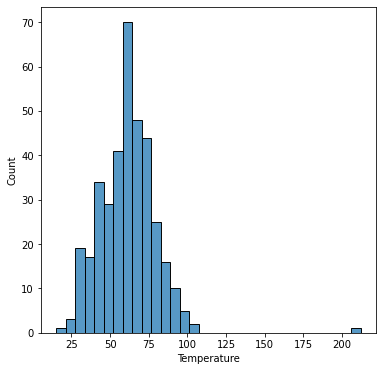

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

Lower Outlier Bound = -16.299999999999997
High Outlier Bound = 137.7
Low Outliers = []
High Outliers = [212.]

-----

RAINFALL


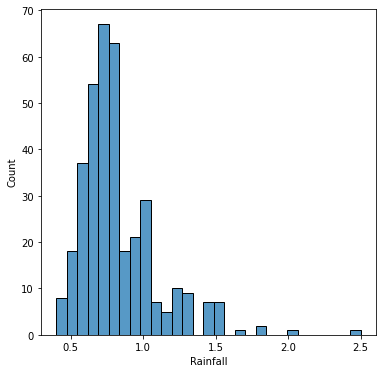

count    365.000000
mean       0.825973
std        0.273890
min        0.400000
25%        0.650000
50%        0.740000
75%        0.910000
max        2.500000
Name: Rainfall, dtype: float64

Lower Outlier Bound = -0.13
High Outlier Bound = 1.69
Low Outliers = []
High Outliers = [2.   1.82 1.82 2.5 ]

-----

FLYERS


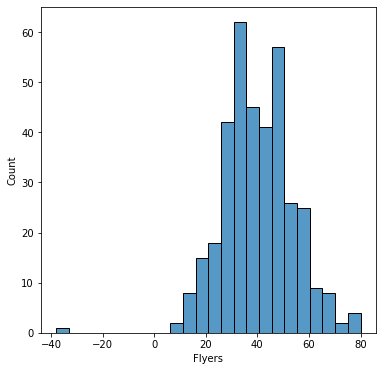

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

Lower Outlier Bound = -23.0
High Outlier Bound = 103.0
Low Outliers = [-38]
High Outliers = []

-----

SALES


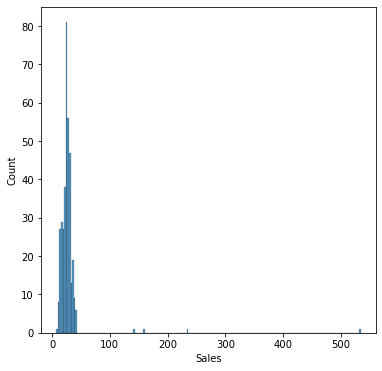

count    365.000000
mean      27.865753
std       30.948132
min        7.000000
25%       20.000000
50%       25.000000
75%       30.000000
max      534.000000
Name: Sales, dtype: float64

Lower Outlier Bound = -10.0
High Outlier Bound = 60.0
Low Outliers = []
High Outliers = [143 158 235 534]

-----



In [23]:
k = 3

df_num = df.drop(columns = ['Date','Day','Price'])
for col in df_num.columns:
        print(col.upper())
        plt.figure(figsize = (6,6))
        sns.histplot(data=df[col])
        plt.show()
        print(df.describe()[col])
        print('')
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        iqr = (q3 - q1)
        low_outlier = q1 - (k * iqr)
        high_outlier = q3 + (k * iqr)
        print(f'Lower Outlier Bound = {low_outlier}\nHigh Outlier Bound = {high_outlier}')
        print(f'Low Outliers = {(df_num[df_num[col] < low_outlier])[col].values}\nHigh Outliers = {(df_num[df_num[col] > high_outlier])[col].values}')
        print('\n-----\n')

Changing the multiplier to 3 mostly eliminated the lower temperature outlier, which we kept when k=1.5 anyway.  The upper outliers for rainfall were reduced; now I might reconsider and first try to see if it made sense to seperate the data into seasons if that made sense.  I'm also starting to wonder about those high outliers for sales, as they are still nowhere near the upper bound.  Really depends on the goal of the analysis.

# II. Identify if any columns in lemonade.csv are normally distributed.

## 1. For normally distributed columns use a 2 sigma decision rule to isolate the outliers.  Do these make sense? Should certain outliers be kept?

Normally distributed columns are the ones analyzed above (Rainfalls skews right and flyers is somewhat bimodal, but I think they both fit).

In [39]:
for col in ['Temperature','Rainfall','Flyers','Sales']:
    print(f'{col} Outliers')
    zscore = ((df[col] - df[col].mean())/df[col].std())
    print(df[col][zscore.abs() >= 2].sort_values())
    print('\n-----\n')

Temperature Outliers
364     15.1
338     22.0
207     97.9
190     98.0
166     99.3
198     99.3
202     99.6
176    102.6
181    102.9
41     212.0
Name: Temperature, dtype: float64

-----

Rainfall Outliers
359    1.43
351    1.43
346    1.43
342    1.43
16     1.43
19     1.43
363    1.43
347    1.54
337    1.54
23     1.54
10     1.54
6      1.54
5      1.54
355    1.54
15     1.67
343    1.82
338    1.82
0      2.00
364    2.50
Name: Rainfall, dtype: float64

-----

Flyers Outliers
324   -38
364     9
338    11
182    68
183    68
204    69
170    70
203    72
207    74
171    76
198    76
166    77
194    80
Name: Flyers, dtype: int64

-----

Sales Outliers
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

-----



#### This was more aggressive than the IQR method with finding outliers.  Which makes sense since if we are looking at a year of data, a 2-sigma difference happens every 3 weeks, or around 17.3 times per year.  I would keep all Temperature outliers except for 212; Drop the negative Flyers outlier, and keep most if not all of Rainfall and examine sales more before dropping those.

# III. Use 3 sigma decision rule to isolate outliers in normal columns.

In [40]:
for col in ['Temperature','Rainfall','Flyers','Sales']:
    print(f'{col} Outliers')
    zscore = ((df[col] - df[col].mean())/df[col].std())
    print(df[col][zscore.abs() >= 3].sort_values())
    print('\n-----\n')

Temperature Outliers
41    212.0
Name: Temperature, dtype: float64

-----

Rainfall Outliers
15     1.67
338    1.82
343    1.82
0      2.00
364    2.50
Name: Rainfall, dtype: float64

-----

Flyers Outliers
324   -38
Name: Flyers, dtype: int64

-----

Sales Outliers
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

-----



#### A 3-sigma rule should eliminate things which if normally distributed happen around once per year.   This makes me think more about removing those rainfall and sales outliers.